### King County - Washington - US

In [155]:
import pandas as pd
import numpy as np
import requests
import datetime
import time
import re



import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


In [156]:
df = pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890.0,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715.0,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060.0,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890.0,0,2003,0,98038,47.3684,-122.031,2390,7570


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [158]:
# Show the statistics of the dataset. 
df.describe()




,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data claning

In [159]:
pd.DataFrame(df.isna().sum()).T


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


In [160]:
# function
# change size 
def resizeplot(l,a):
    plt.figure(figsize=(l,a))
    
def preprocess(X, y):
    X = ((X - X.mean(axis = 0))/(X.max(axis = 0)-X.min(axis = 0)))
    y = (y-y.mean())/(y.max()-y.min())
    return X, y

## preprocessing
calculating gradients gets computationally expensive.
We can speed this up by normalizing the input data to ensure all values are within the same range.

In [161]:
X = np.array(df['sqft_living']) # placeholder for the variables
y = np.array(df['price']) # placeholder for the target values
print(X)

[1180 2570  770 ... 1020 1600 1020]


In [162]:
X, y = preprocess(X, y)
print(X)

[-0.06791696  0.0369887  -0.09886036 ... -0.07999243 -0.03621885
 -0.07999243]


## Data Visualization

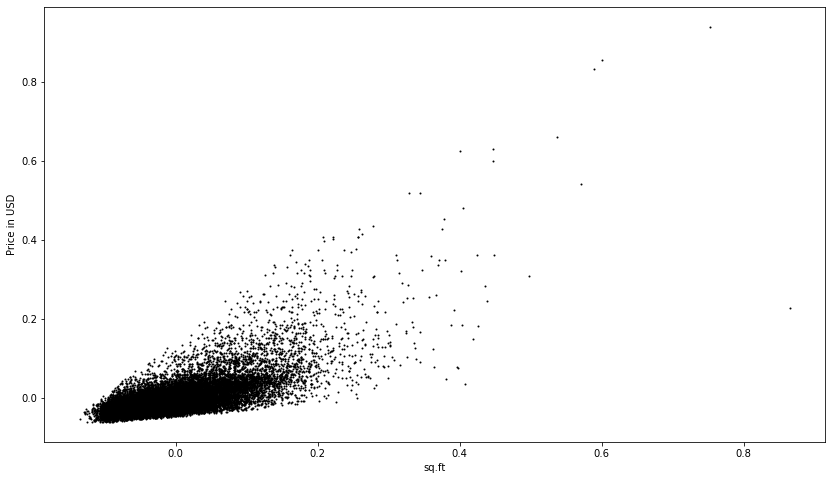

In [163]:
plt.plot(X, y, 'ro', ms=1, mec='k') 
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.show()

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

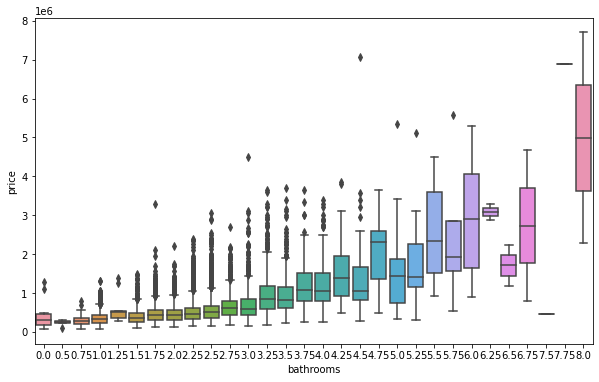

In [164]:
# number of bathrooms with price
resizeplot(10,6)
sns.boxplot(x='bathrooms',y='price',data=df)

<AxesSubplot:xlabel='view', ylabel='count'>

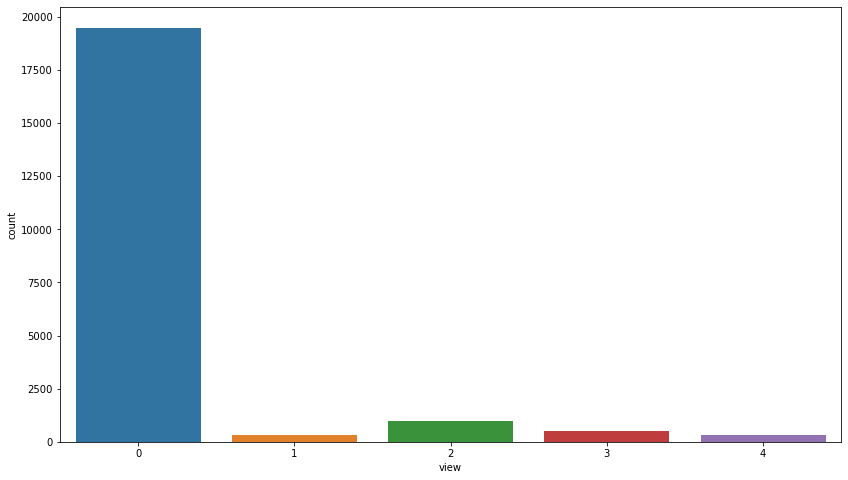

In [165]:
sns.countplot(x='view',data=df)

## Determine the Features & Target Variable

In [166]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [167]:
X = df[['bedrooms','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade']]


In [168]:
X

,bedrooms,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
0,3,3,1.00,1180,5650,1.0,0,0,3,7
1,3,3,2.25,2570,7242,2.0,0,0,3,7
2,2,2,1.00,770,10000,1.0,0,0,3,6
3,4,4,3.00,1960,5000,1.0,0,0,5,7
4,3,3,2.00,1680,8080,1.0,0,0,3,8
...,...,...,...,...,...,...,...,...,...,...
21608,3,3,2.50,1530,1131,3.0,0,0,3,8
21609,4,4,2.50,2310,5813,2.0,0,0,3,8
21610,2,2,0.75,1020,1350,2.0,0,0,3,7
21611,3,3,2.50,1600,2388,2.0,0,0,3,8


In [169]:
y=df['price']

In [170]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

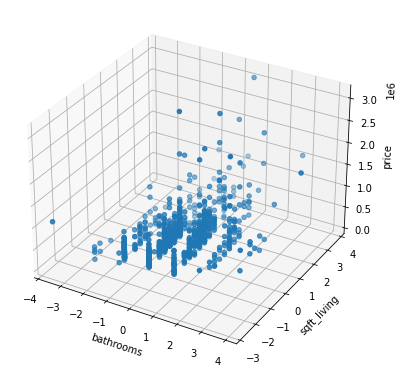

In [174]:
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
xx = X[:, 1][:1000]
yy = X[:, 2][:1000]
zz = y[:1000]
ax.scatter(xx, yy, zz, marker='o')
ax.set_xlabel('bathrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.show()

## Normalization 

In [175]:
std = StandardScaler()
X = std.fit_transform(X)

## split data

In [218]:
X_train ,X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(17290, 10) (4323, 10) (17290,) (4323,)


## Linear Regression



In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


In [226]:
trained_model = train_model(X_train, y_train)
y_pred = trained_model.predict(X_test)

In [227]:
r2_score(y_test, y_pred)

0.5975859851534069

In [228]:
model_line = LinearRegression(normalize=True,fit_intercept=True,n_jobs=1)
model_line.fit(X_train,y_train)

y_train_pred = model_line.predict(X_train)
y_pred = model_line.predict(X_test)


print("Train score:",r2_score(y_train,y_train_pred))
print("Test score:",r2_score(y_test,y_pred))

Train score: 0.6063583297914724
Test score: 0.5975859851534071


## Result
The results we got make perfect sense, house prices depend on the size ('sqft_living')
and also by the fact is there a view or isn't. 